In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = sns.load_dataset('iris')

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Normalization

In [16]:
# separate input and output

x = df.drop('species', axis = 1)
y = df['species']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


#### cross validation

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25,
                                                   stratify= y)

In [43]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [45]:
x_test.shape, y_test.shape

((38, 4), (38,))

In [47]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [49]:
y_train.value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [51]:
y_test.value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64

#### build the model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
y_pred = knn.predict(x_test)

In [58]:
np.mean(y_test != y_pred)

0.02631578947368421

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

#### Appropriate K value

In [63]:
error = []

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error.append(np.mean(y_test != y_pred))

In [67]:
error;

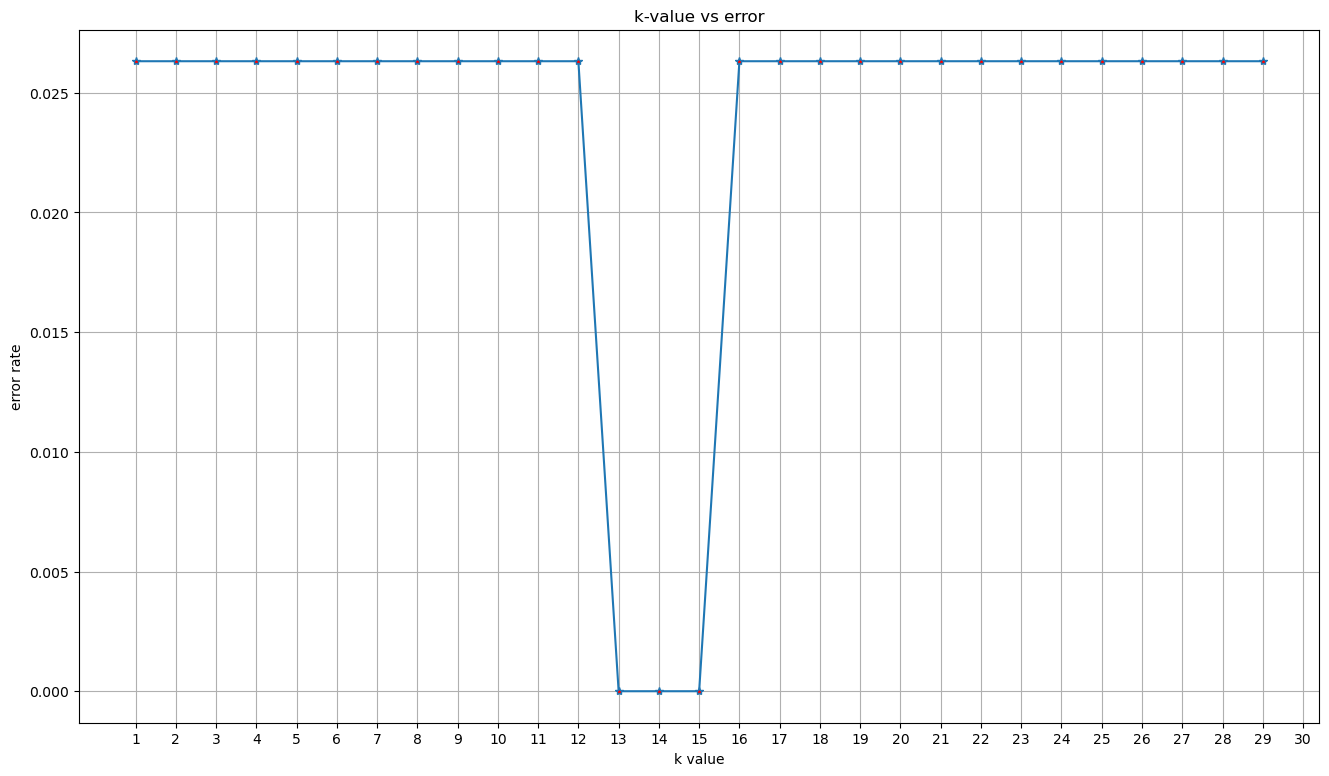

In [73]:
# graph
plt.figure(figsize=(16,9))
plt.title('k-value vs error')
plt.xlabel('k value')
plt.ylabel('error rate')
plt.xticks(range(1,31,1))
plt.plot(range(1,30), error, marker = '*', mfc = 'red');
plt.grid();

In [75]:
# build the model with k value = 14

In [77]:
knn = KNeighborsClassifier(n_neighbors= 14)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [79]:
y_pred = knn.predict(x_test)

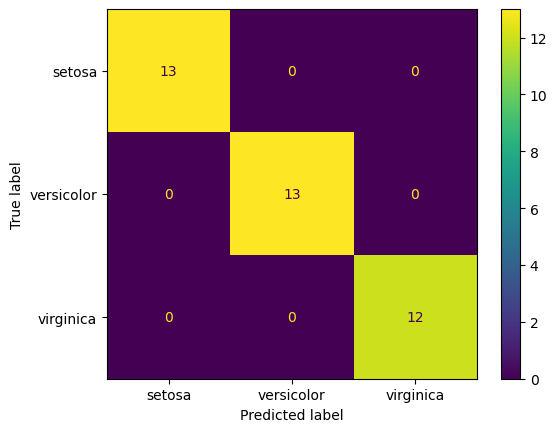

In [81]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [85]:
accuracy_score(y_test, y_pred)

1.0